In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lets-surpass-the-hosts-bayesian-model/submission.csv
/kaggle/input/lets-surpass-the-hosts-bayesian-model/train_df.csv
/kaggle/input/lets-surpass-the-hosts-bayesian-model/test_df.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/lets-surpass-the-hosts-bayesian-model/train_df.csv')
train_df.head()

id         A         B         C         D         E         F         G  \
0   0 -0.764706 -0.125628 -0.049180 -0.676768 -0.877069 -0.025335 -0.924851   
1   1 -0.294118 -0.015075 -0.049180 -0.333333 -0.550827  0.013413 -0.699402   
2   2 -0.529412  0.296482 -0.016393 -0.757576 -0.453901 -0.180328 -0.616567   
3   3 -0.294118 -0.035176  0.000000  0.000000  0.000000 -0.293592 -0.904355   
4   4 -0.882353  0.678392  0.213115 -0.656566 -0.659574 -0.302534 -0.684885   

          H         I  Target  
0 -0.866667  0.108708     1.0  
1 -0.266667  0.141557     1.0  
2 -0.666667  0.391948     1.0  
3 -0.766667 -0.308665     1.0  
4 -0.600000 -0.461514     0.0

In [3]:
test_df = pd.read_csv('/kaggle/input/lets-surpass-the-hosts-bayesian-model/test_df.csv')
test_df.head()

id         A         B         C         D         E         F         G  \
0  420 -0.294118  0.346734  0.147541 -0.535354 -0.692671  0.055142 -0.603757   
1  421 -0.764706  0.256281 -0.016393 -0.595960 -0.669031  0.007452 -0.991460   
2  422 -0.882353 -0.065327 -0.081967 -0.777778  0.000000 -0.329359 -0.710504   
3  423 -0.882353 -0.165829  0.114754  0.000000  0.000000 -0.457526 -0.533732   
4  424 -0.882353 -0.095477  0.016393 -0.757576 -0.898345 -0.189270 -0.571307   

          H         I  
0 -0.733333  0.181786  
1 -0.666667 -0.324770  
2 -0.966667  0.853175  
3 -0.800000  0.901214  
4 -0.900000 -0.250775

In [4]:
train_df.shape

(420, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   A       420 non-null    float64
 2   B       420 non-null    float64
 3   C       420 non-null    float64
 4   D       420 non-null    float64
 5   E       420 non-null    float64
 6   F       420 non-null    float64
 7   G       420 non-null    float64
 8   H       420 non-null    float64
 9   I       420 non-null    float64
 10  Target  420 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 36.2 KB


In [6]:
train_df.describe()

id           A           B           C           D           E  \
count  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000   
mean   209.500000   -0.394398    0.221046    0.174317   -0.290524   -0.313092   
std    121.387808    0.387679    0.312284    0.202982    0.269007    0.380777   
min      0.000000   -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   
25%    104.750000   -0.764706   -0.005025    0.016393   -0.515152   -0.702719   
50%    209.500000   -0.411765    0.175879    0.180328   -0.313131    0.000000   
75%    314.250000    0.000000    0.417085    0.311475    0.000000    0.000000   
max    419.000000    1.000000    0.989950    1.000000    1.000000    1.000000   

                F           G           H           I      Target  
count  420.000000  420.000000  420.000000  420.000000  420.000000  
mean    -0.040739   -0.662783   -0.511587   -0.033183    0.657143  
std      0.209958    0.294778    0.405620    0.606647    0.475230  
min     -0.457526   -0.994876   -0.966667   -0.989877    0.000000  
25%     -0.195976   -0.864646   -0.866667   -0.604031    0.000000  
50%     -0.044709   -0.748933   -0.633333   -0.014864    1.000000  
75%      0.064829   -0.520068   -0.233333    0.512250    1.000000  
max      1.000000    1.000000    1.000000    0.999435    1.000000

missing values

In [7]:
train_df.isnull().sum()

id        0
A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
Target    0
dtype: int64

No missing values founded

EDA

In [8]:
train_df['Target'].value_counts()

Target
1.0    276
0.0    144
Name: count, dtype: int64

<Axes: ylabel='count'>

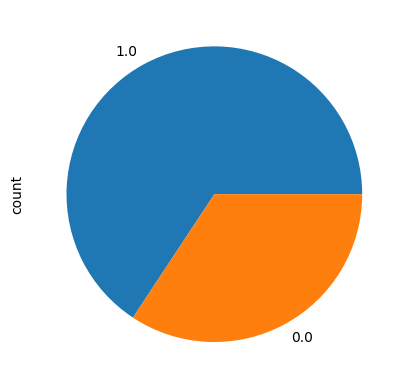

In [9]:
train_df['Target'].value_counts().plot(kind='pie')

In [10]:
col = ['A','B','C','D','E','F','G','H','I']
#obj_var = train_df['Target']
obj_var = "Target"

boxplot

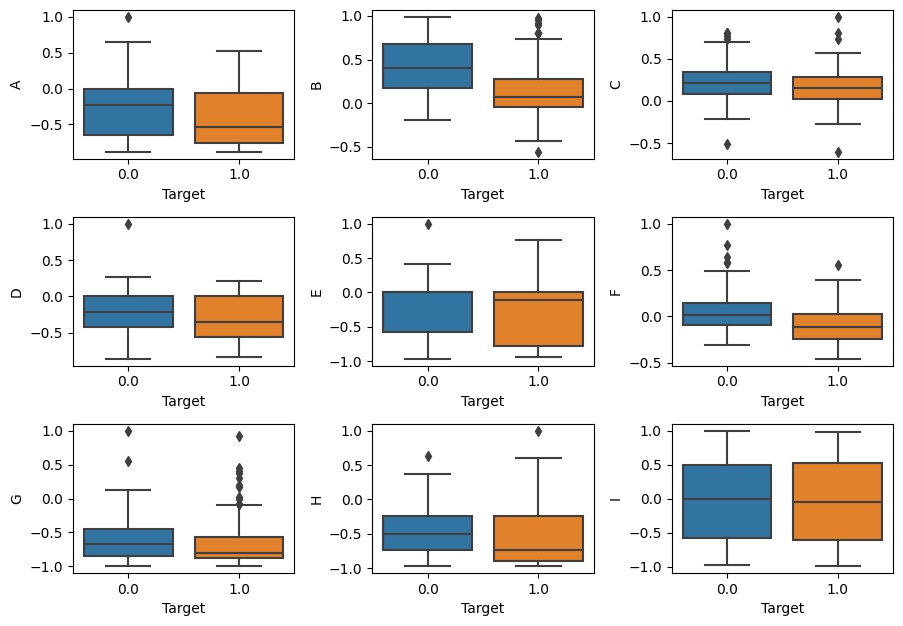

In [11]:
# boxplot
import seaborn as sns
nsub = len(col)
ncol = 3
nrow = nsub // ncol + 1
plt.figure(figsize=(ncol * 3, nrow * 2))
for i, var in enumerate(col):
    plt.subplot(nrow, ncol, i + 1)
    sns.boxplot(data=train_df.astype({obj_var: "category"}), x=obj_var, y=var)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(xlabel=obj_var, fontsize=10)
    plt.ylabel(ylabel=var, fontsize=10)
plt.tight_layout()
plt.show()

hisplot

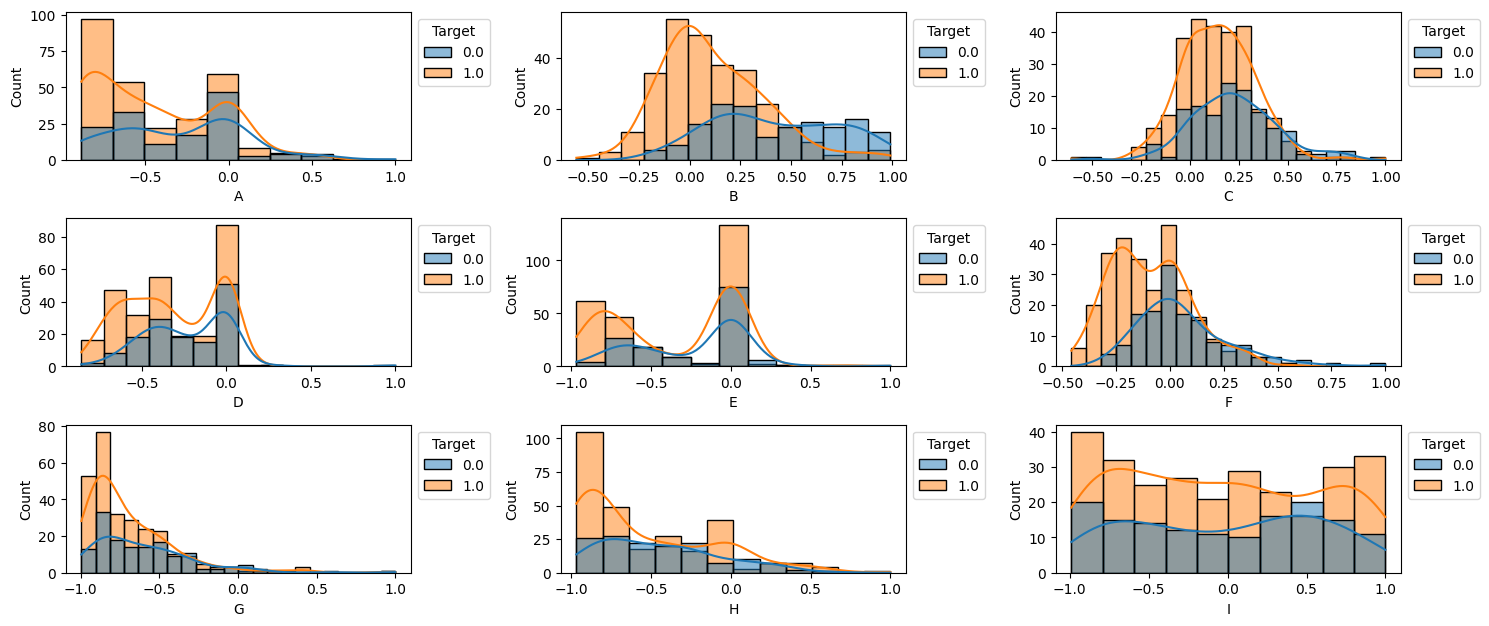

In [12]:
# histplot
nsub = len(col)
ncol = 3
nrow = nsub // ncol + 1
plt.figure(figsize=(ncol * 5, nrow * 2))
for i, var in enumerate(col):
    plt.subplot(nrow, ncol, i + 1)
    ax = sns.histplot(train_df.astype({obj_var: "category"}), x=var, hue=obj_var, kde=True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(xlabel=var, fontsize=10)
    plt.ylabel(ylabel="Count", fontsize=10)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

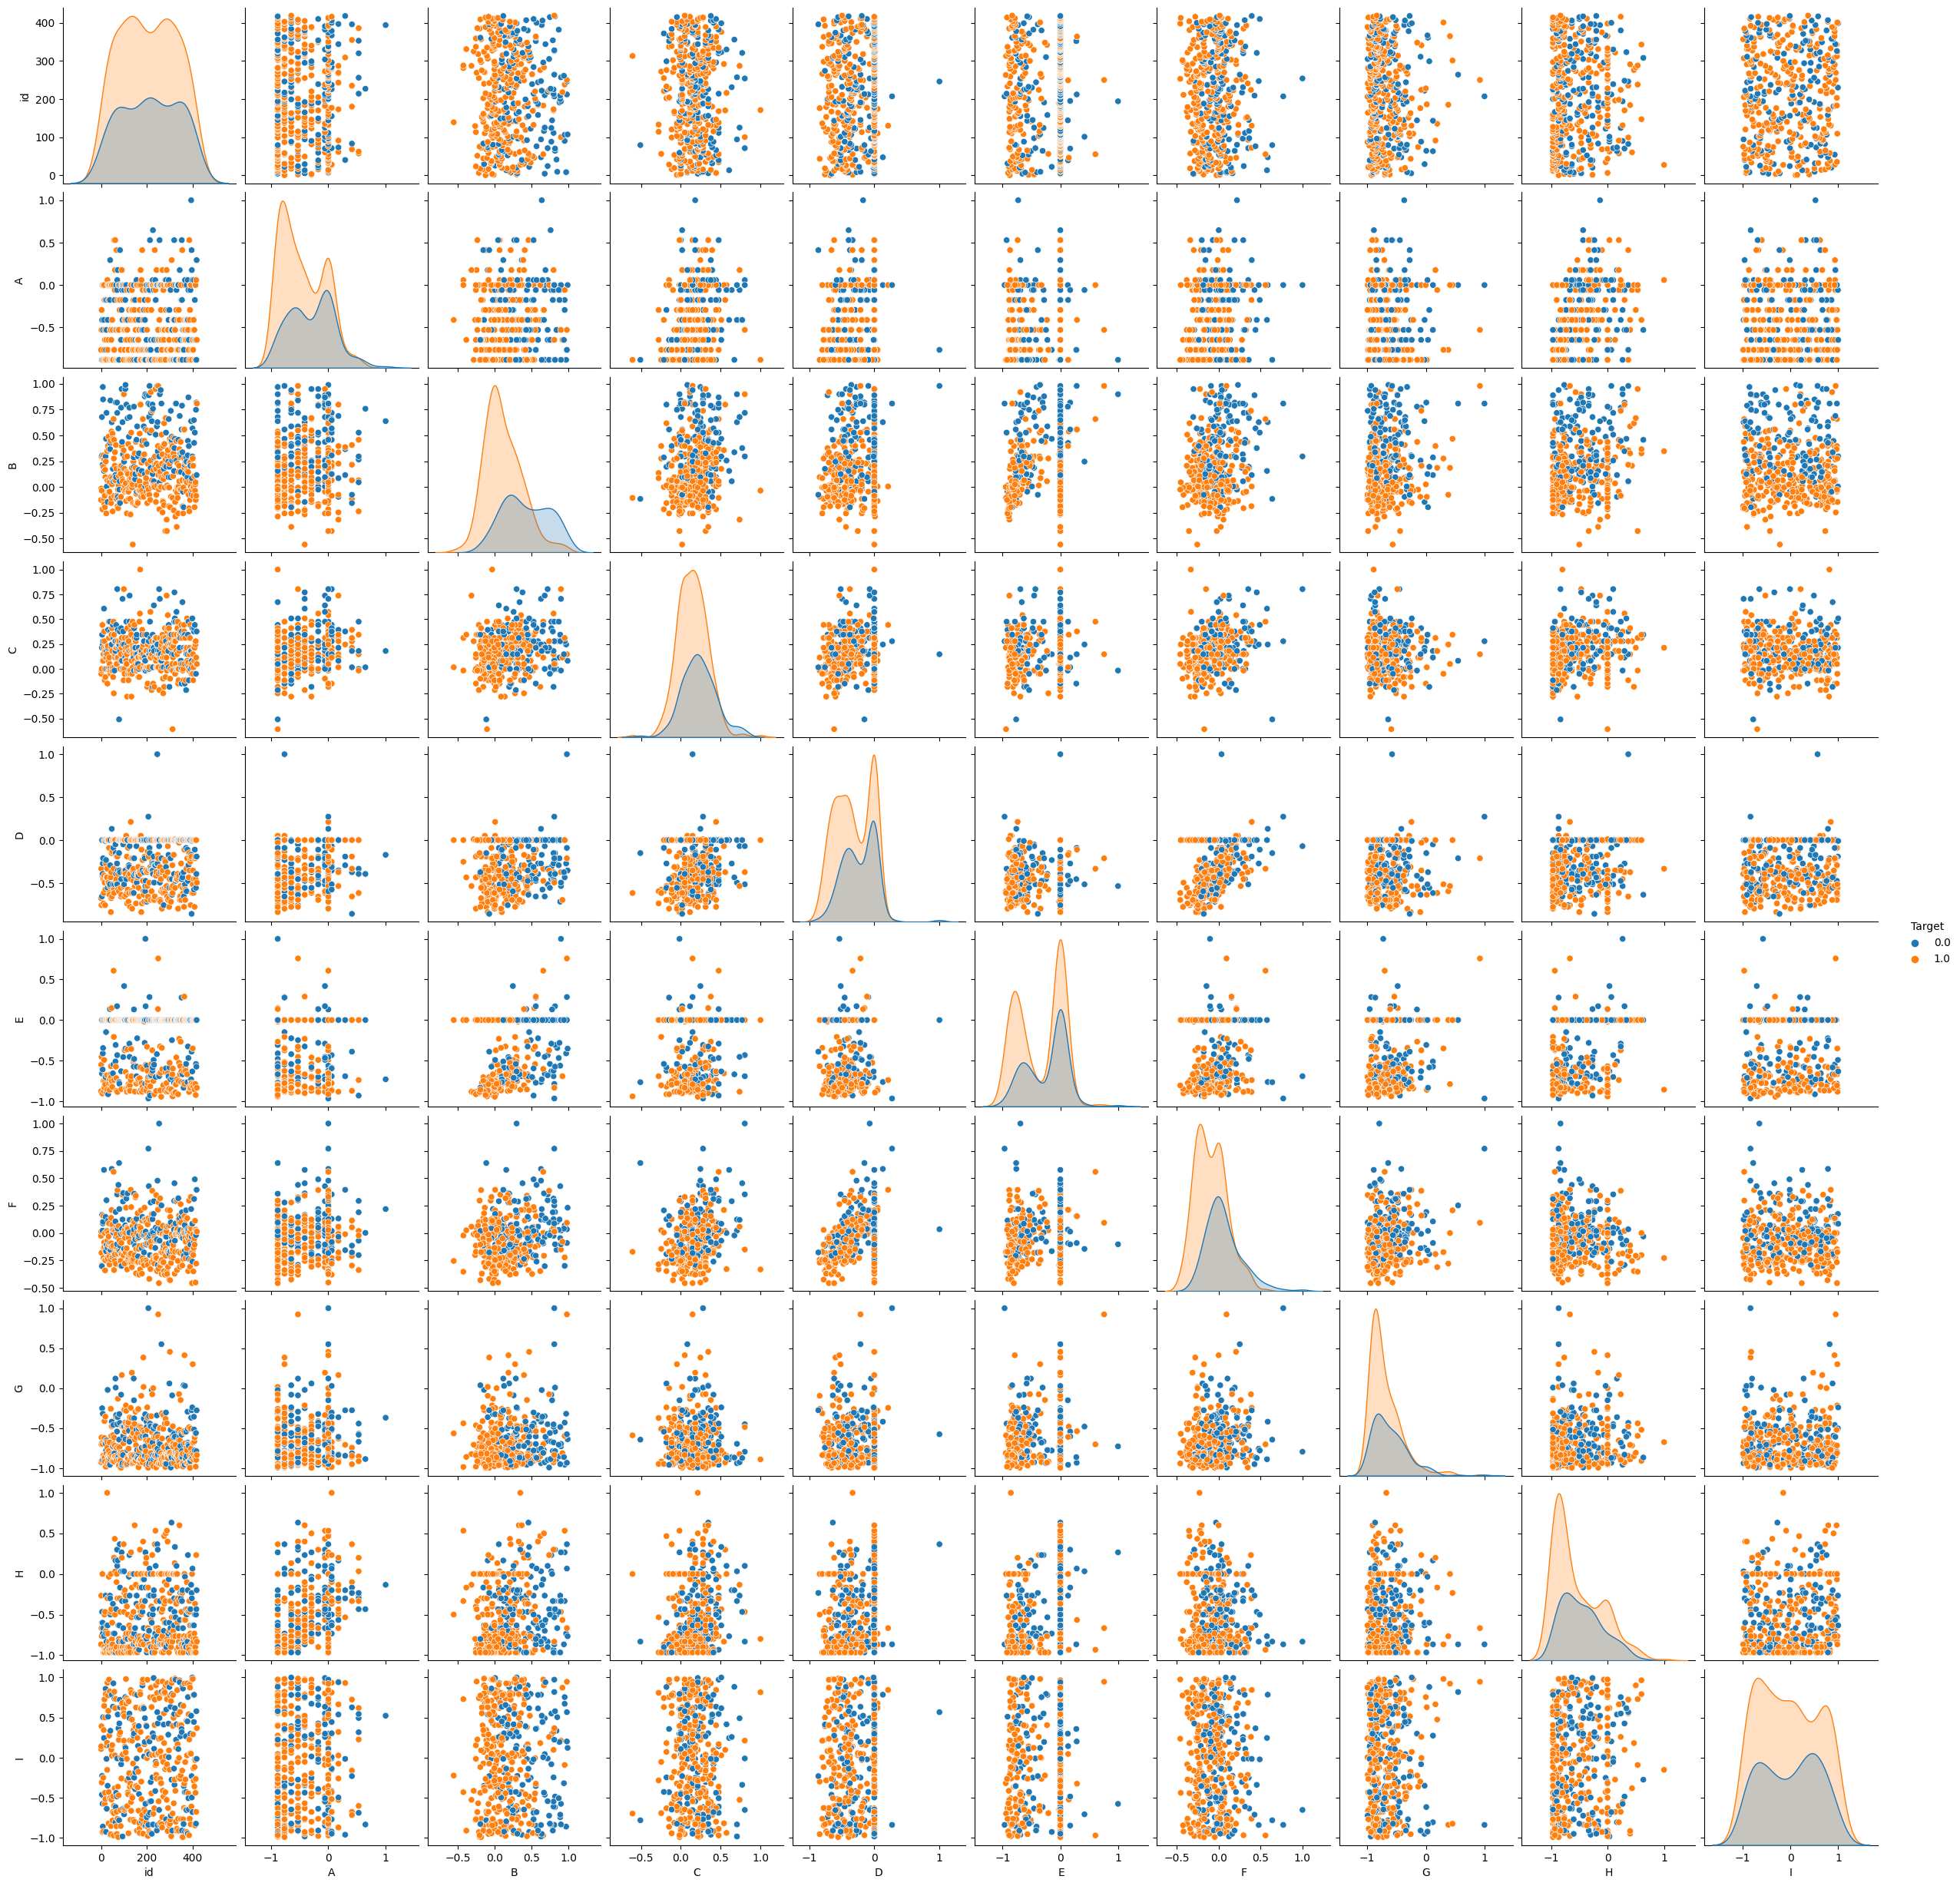

In [13]:
sns.pairplot(train_df, hue='Target')

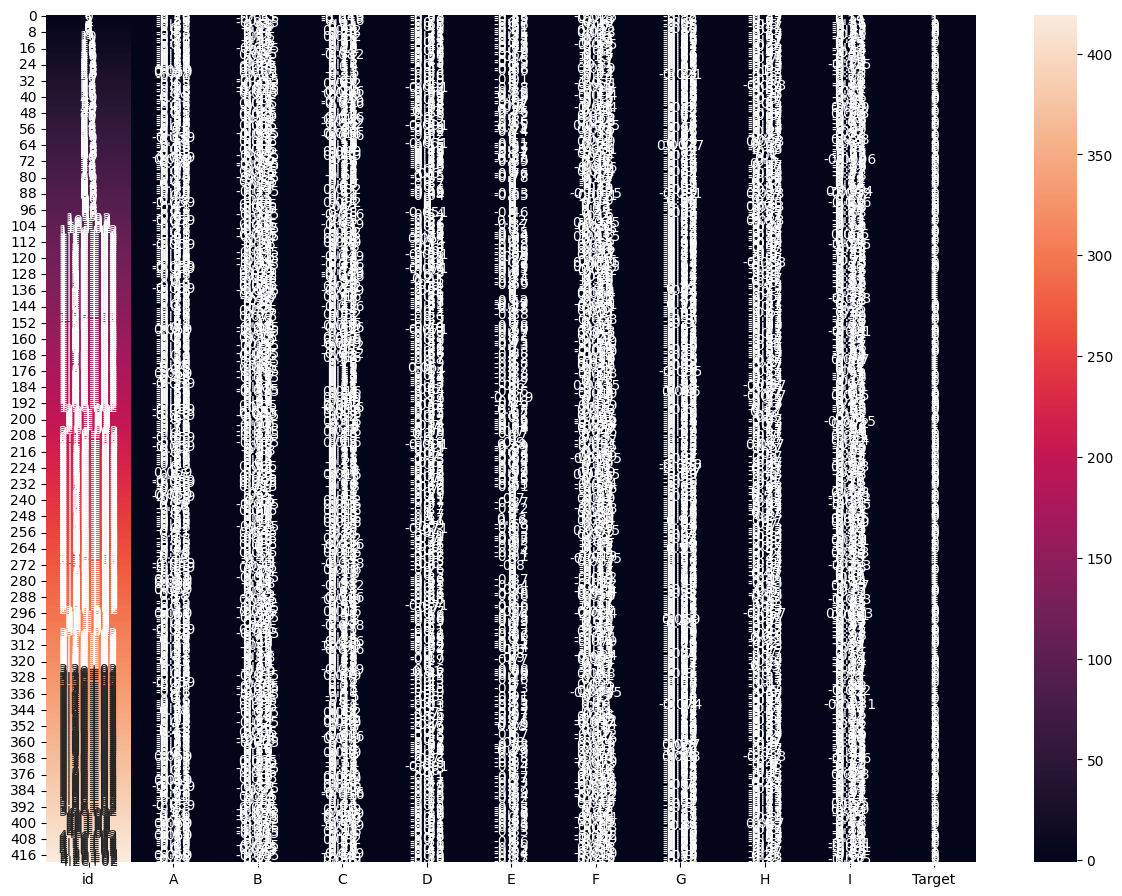

In [14]:
fig , ax = plt.subplots(figsize=(15,11))
sns.heatmap(train_df, annot=True)
plt.show()


Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = train_df.drop(columns = ['id','Target'], axis=1)
y = train_df['Target']

In [17]:
X

A         B         C         D         E         F         G  \
0   -0.764706 -0.125628 -0.049180 -0.676768 -0.877069 -0.025335 -0.924851   
1   -0.294118 -0.015075 -0.049180 -0.333333 -0.550827  0.013413 -0.699402   
2   -0.529412  0.296482 -0.016393 -0.757576 -0.453901 -0.180328 -0.616567   
3   -0.294118 -0.035176  0.000000  0.000000  0.000000 -0.293592 -0.904355   
4   -0.882353  0.678392  0.213115 -0.656566 -0.659574 -0.302534 -0.684885   
..        ...       ...       ...       ...       ...       ...       ...   
415 -0.647059  0.748744 -0.049180 -0.555556 -0.541371 -0.019374 -0.560205   
416  0.058824 -0.085427  0.114754  0.000000  0.000000 -0.278688 -0.895816   
417 -0.882353  0.819095  0.049180 -0.393939 -0.574468  0.016393 -0.786507   
418  0.294118  0.115578  0.377049 -0.191919  0.000000  0.394933 -0.276687   
419 -0.647059  0.809045  0.049180 -0.494949 -0.834515  0.013413 -0.835184   

            H         I  
0   -0.866667  0.108708  
1   -0.266667  0.141557  
2   -0.666667  0.391948  
3   -0.766667 -0.308665  
4   -0.600000 -0.461514  
..        ...       ...  
415 -0.500000 -0.822595  
416  0.233333 -0.674766  
417 -0.433333  0.579236  
418 -0.200000 -0.014764  
419 -0.833333  0.368466  

[420 rows x 9 columns]

In [18]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
415    0.0
416    1.0
417    0.0
418    0.0
419    1.0
Name: Target, Length: 420, dtype: float64

<Axes: ylabel='count'>

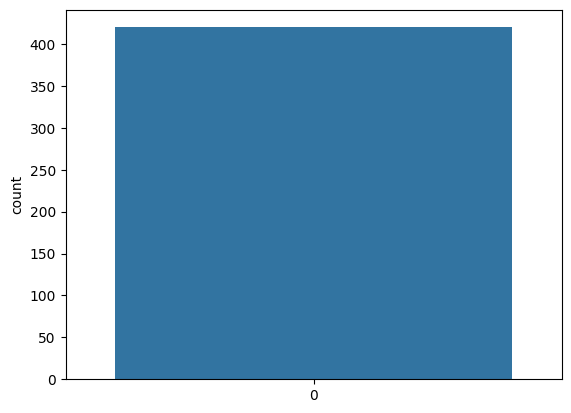

In [19]:
sns.countplot(y)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(420, 9) (336, 9) (84, 9)


In [22]:
print(y.shape, y_train.shape, y_test.shape)

(420,) (336,) (84,)


model building

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
# Train classical models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
naive_bayes = GaussianNB()

In [25]:
l = logistic_regression.fit(X_train, y_train)
print(l)

r = random_forest.fit(X_train, y_train)
print(r)

g = gradient_boosting.fit(X_train, y_train)
print(g)

n = naive_bayes.fit(X_train, y_train)
print(n)

LogisticRegression()
RandomForestClassifier()
GradientBoostingClassifier()
GaussianNB()


In [26]:
# Evaluate the models
models = {
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting,
    'Naive Bayes': naive_bayes
    #'Neural Network': neural_network
}

In [27]:
from sklearn.metrics import accuracy_score, classification_report
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("="*50)

Logistic Regression - Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.52      0.60        27
         1.0       0.80      0.89      0.84        57

    accuracy                           0.77        84
   macro avg       0.75      0.71      0.72        84
weighted avg       0.77      0.77      0.76        84

Random Forest - Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.67      0.65        27
         1.0       0.84      0.82      0.83        57

    accuracy                           0.77        84
   macro avg       0.74      0.75      0.74        84
weighted avg       0.78      0.77      0.77        84

Gradient Boosting - Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.59      0.60        27
         1.0       0.81      0.82      0.82        57

    acc

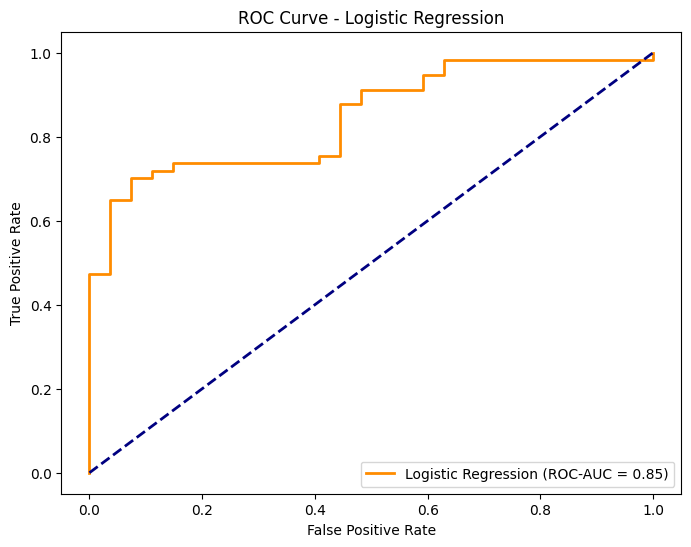

Logistic Regression - ROC-AUC: 0.85


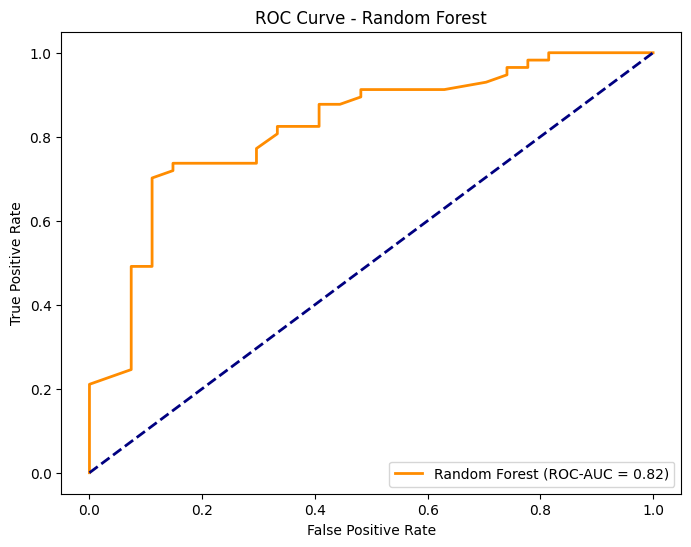

Random Forest - ROC-AUC: 0.82


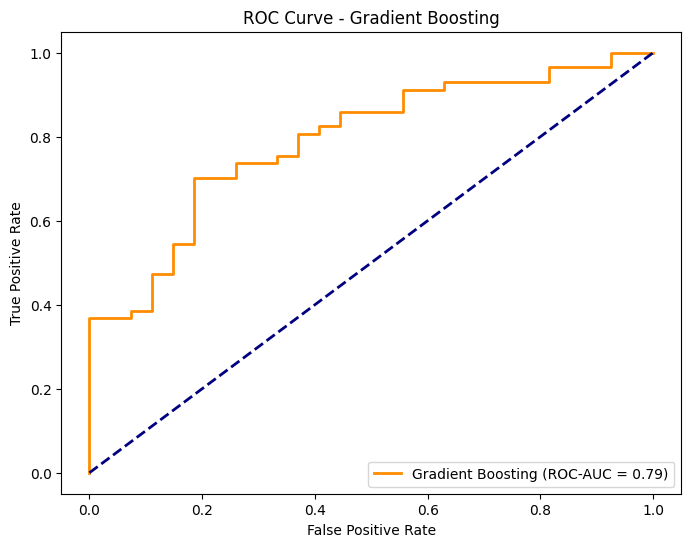

Gradient Boosting - ROC-AUC: 0.79


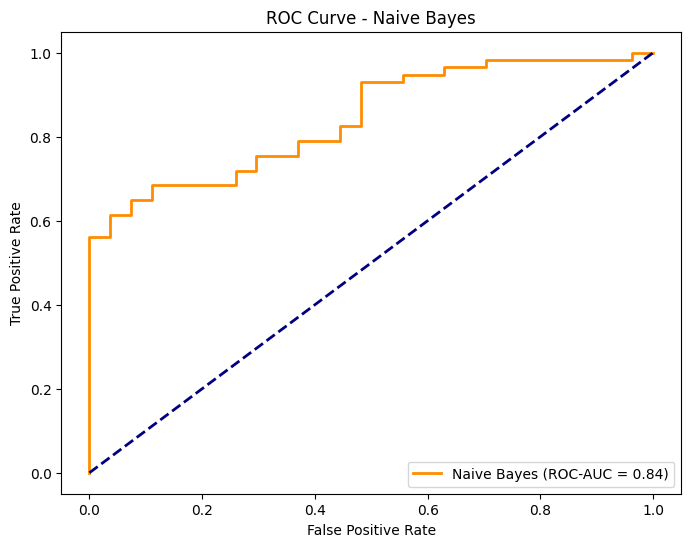

Naive Bayes - ROC-AUC: 0.84


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc_value = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"{name} - ROC-AUC: {roc_auc:.2f}")

**out of all the models, Logistic regression has more value of ROC-AUC: 0.85**

**submission**

In [29]:
submission_df = pd.read_csv('/kaggle/input/lets-surpass-the-hosts-bayesian-model/submission.csv')
submission_df.head()

id  Target
0  420       1
1  421       1
2  422       1
3  423       1
4  424       1

In [30]:
submission_df['Target'] = l.predict_proba(test_df.drop(columns='id'))[:, 1]

In [31]:
submission_df.head()

id    Target
0  420  0.575520
1  421  0.775800
2  422  0.917656
3  423  0.925847
4  424  0.918365

In [32]:
# save submission
submission_df.to_csv('./submission.csv', index=False)